In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import Binarizer
from tqdm import tqdm_notebook

from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import accuracy_score

%matplotlib inline

In [110]:
train = pd.read_csv('../infopulsehackathon/train.csv', index_col='Id')
test = pd.read_csv('../infopulsehackathon/test.csv', index_col='Id')

In [111]:
y = train['Energy_consumption']
train.drop(columns=['Energy_consumption'], inplace=True)

In [112]:
df = pd.concat((train, test))

In [113]:
df = df.drop(columns=['feature_226', 'feature_231'])

In [114]:
num_unique = df.agg(lambda x: len(np.unique(x)))

In [115]:
num_unique[num_unique == 1]

Series([], dtype: int64)

In [116]:
df.shape

(5686, 283)

In [117]:
df.dtypes[df.dtypes==object]

feature_3      object
feature_4      object
feature_257    object
feature_258    object
dtype: object

In [118]:
num_unique_val = 1000

In [119]:
category_col = num_unique[num_unique < num_unique_val].index.to_list()
num_col = num_unique[num_unique > num_unique_val].index.to_list()

In [120]:
df = pd.concat((df, df[category_col].rename(lambda x: str(x)+'_new', axis=1)), axis=1)

In [121]:
df[category_col] = df[category_col].astype(str)

In [122]:
df = df.drop(columns=['feature_3_new', 'feature_4_new', 'feature_257_new', 'feature_258_new'])

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(df[:len(y)], y, test_size=0.2, random_state=42)

In [131]:
count, val = np.histogram(y, 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[:len(y)], y,test_size=0.2, random_state=42)

In [81]:
model = CatBoostRegressor(
    random_seed=42,
    logging_level='Silent',
    od_type='Iter',
    od_wait=40,
    iterations=1000, 
)

In [82]:
# model = CatBoostRegressor(
#     random_seed=42,
#     logging_level='Silent',
#     od_type='Iter',
#     od_wait=40,
#     iterations=1000, 
#     max_depth=5
# )

In [89]:
res = cross_validate(
    model, X_train, y_train,
    cv=5, n_jobs=-1, verbose=10,
    scoring=make_scorer(mean_squared_error),
    fit_params={'cat_features':['feature_3', 'feature_4', 'feature_257', 'feature_258']})

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   48.4s remaining:   32.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


In [93]:
res['test_score']

array([608649.03986059, 685958.68450651, 577084.252435  , 717386.86577092,
       794360.14296873])

In [95]:
model = CatBoostRegressor(
    random_seed=42,
    logging_level='Silent',
    od_type='Iter',
    od_wait=40,
    iterations=700, 
)

In [97]:
model.fit(
    df[:len(y)], y,
    cat_features=['feature_3', 'feature_4', 'feature_257', 'feature_258'],
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [98]:
mean_squared_error(y_test, model.predict(X_test))

284359.43733053346

In [76]:
mean_squared_error(y_test, model.predict(X_test))

584752.5281983733

In [59]:
y_pred = model.predict(X_test)

In [58]:
np.mean((y_test - y_pred)**2)

4901528.69088751

In [108]:
y.sort_values()

Id
3576       36.272807
2824       53.874357
1775       99.709571
3532      124.280557
1192      144.501335
1294      163.986737
3319      171.084537
3327      172.503747
1730      191.301425
2183      205.843611
947       211.218600
3867      212.596966
2410      218.429789
3571      219.810684
68        230.584778
30        232.801212
1434      234.079804
3892      235.335640
1846      236.567749
3874      241.460396
2375      242.925312
2084      251.902492
684       255.574311
5         256.768688
280       256.924282
337       259.355435
1901      259.586297
2278      264.710585
3078      269.663525
3451      269.955264
            ...     
2510     6778.256145
2677     6805.832231
2643     6819.305877
1646     6862.527893
3427     7259.052110
332      7281.319918
739      7296.805781
734      7299.912406
336      7495.775842
3347     7521.223015
3024     7555.579101
2401     7635.713221
2036     7636.851778
2565     7663.912654
3639     7734.179403
3117     7774.367923
1292     7

In [106]:
plt.hist(y, bins=30)

(array([130., 466., 579., 573., 510., 420., 366., 261., 194., 146., 112.,
         81.,  59.,  27.,  19.,  22.,   9.,   4.,   8.,   1.,   1.,   2.,
          2.,   1.,   1.,   0.,   0.,   3.,   1.,   2.]),
 array([   36.27280739,   444.90303961,   853.53327182,  1262.16350404,
         1670.79373626,  2079.42396847,  2488.05420069,  2896.68443291,
         3305.31466512,  3713.94489734,  4122.57512956,  4531.20536177,
         4939.83559399,  5348.46582621,  5757.09605842,  6165.72629064,
         6574.35652286,  6982.98675507,  7391.61698729,  7800.24721951,
         8208.87745172,  8617.50768394,  9026.13791616,  9434.76814837,
         9843.39838059, 10252.02861281, 10660.65884502, 11069.28907724,
        11477.91930946, 11886.54954167, 12295.17977389]),
 <a list of 30 Patch objects>)

(array([ 24.,  48.,  84., 102., 112., 140., 133., 149., 126., 123., 118.,
         94.,  90.,  72.,  61.,  56.,  42.,  23.,  18.,  18.,  13.,  11.,
         11.,   4.,   7.,   4.,   2.,   0.,   0.,   1.]),
 array([ 168.35996503,  382.85972408,  597.35948313,  811.85924218,
        1026.35900123, 1240.85876028, 1455.35851934, 1669.85827839,
        1884.35803744, 2098.85779649, 2313.35755554, 2527.85731459,
        2742.35707364, 2956.85683269, 3171.35659175, 3385.8563508 ,
        3600.35610985, 3814.8558689 , 4029.35562795, 4243.855387  ,
        4458.35514605, 4672.8549051 , 4887.35466416, 5101.85442321,
        5316.35418226, 5530.85394131, 5745.35370036, 5959.85345941,
        6174.35321846, 6388.85297751, 6603.35273657]),
 <a list of 30 Patch objects>)

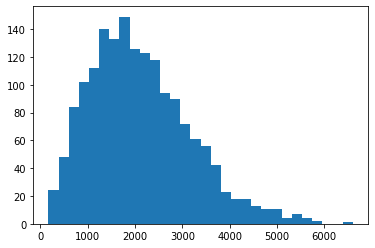

In [105]:
plt.hist(pred, bins=30)

In [99]:
pred = model.predict(df[len(y):])

In [100]:
subm = pd.read_csv('../infopulsehackathon/sample_submission.csv')

In [101]:
subm['Energy_consumption'] = pred

In [102]:
subm.to_csv('cat_4_categ.csv', index=False)

In [21]:
mean_squared_error(y_test, model.predict(X_test))

560996.8004774161

In [167]:
mean_squared_error(y_test, model.predict(X_test))

571763.1499706083

In [59]:
mean_squared_error(y_test, model.predict(X_test[selected_features]))

347496.7015954514

In [196]:
pred = model.predict(df[len(y):])

In [197]:
subm = pd.read_csv('../infopulsehackathon/sample_submission.csv')

In [198]:
subm['Energy_consumption'] = pred

In [199]:
subm.to_csv('cat_categ_and_num2.csv', index=False)

In [200]:
pred_2 = pd.read_csv('cat_categ_and_num.csv')

In [202]:
res = (subm['Energy_consumption'] + pred_2['Energy_consumption']) / 2

In [203]:
subm = pd.read_csv('../infopulsehackathon/sample_submission.csv')

In [204]:
subm['Energy_consumption'] = res

In [206]:
subm.to_csv('mean_1_2_cat_categ_and_num.csv', index=False)

In [208]:
a = pd.read_csv('cat_boost.csv')
b = pd.read_csv('cat_boost3.csv')
c = pd.read_csv('cat_boost_5.csv')

In [211]:
subm['Energy_consumption'] = (a['Energy_consumption'] + b['Energy_consumption'] + c['Energy_consumption'] )/3

In [212]:
subm.to_csv('mean_1_3_5_cat.csv', index=False)

In [81]:
pd.Series(dict(zip(X_train.columns, model.feature_importances_))).sort_values()

feature_86      0.000000
feature_122     0.000000
feature_48      0.000000
feature_49      0.000000
feature_54      0.000000
feature_135     0.000000
feature_73      0.005043
feature_104     0.010606
feature_126     0.013466
feature_128     0.013702
feature_115     0.015708
feature_30      0.016164
feature_123     0.018802
feature_47      0.021869
feature_103     0.025054
feature_124     0.030989
feature_125     0.035129
feature_133     0.038989
feature_110     0.041161
feature_109     0.044960
feature_58      0.049358
feature_105     0.051851
feature_117     0.053351
feature_127     0.057636
feature_77      0.059273
feature_70      0.059706
feature_22      0.069424
feature_68      0.070420
feature_11      0.072954
feature_8       0.076352
                 ...    
feature_24      0.728520
feature_33      0.740392
feature_89      0.797963
feature_9       0.833008
feature_64      0.859977
feature_34      0.896961
feature_112     0.957063
feature_119     1.058035
feature_15      1.167921


In [64]:
feature_importances2 = pd.Series(dict(zip(X_train.columns, model.feature_importances_)))

In [73]:
selected_features = feature_importances2[feature_importances2>0.1].index.to_list()

In [16]:
mean_squared_error(y_test, model.predict(X_test))

605015.6167885575

In [38]:
feature_importances = pd.Series(dict(zip(X_train.columns, model.feature_importances_)))

In [42]:
selected_features = feature_importances[selected_features>0.01].index.to_list()

In [ ]:
aa

In [30]:
[pd.Series(dict(zip(X_train.columns, model.feature_importances_))) > 0.01]).sum()

234

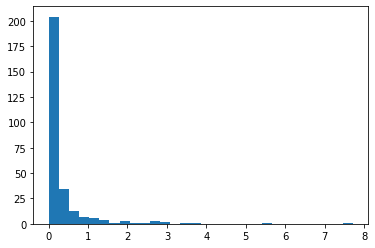

In [35]:
plt.hist(model.feature_importances_, bins=30);

In [32]:
np.round(model.feature_importances_, 2)

array([5.59, 1.13, 0.22, 0.47, 3.79, 0.24, 0.1 , 0.33, 0.06, 0.01, 0.01,
       0.04, 0.  , 0.33, 0.37, 0.5 , 1.43, 2.31, 0.5 , 0.26, 0.24, 0.15,
       0.24, 0.05, 0.02, 0.31, 0.06, 0.05, 0.01, 0.01, 0.04, 2.21, 0.74,
       2.78, 0.04, 0.03, 0.45, 0.32, 0.07, 0.08, 0.09, 1.23, 0.2 , 0.23,
       0.03, 0.11, 0.41, 0.58, 0.75, 0.93, 0.56, 1.04, 0.97, 0.16, 0.11,
       0.17, 0.02, 0.01, 0.17, 0.33, 0.12, 0.05, 0.05, 0.19, 0.04, 0.48,
       0.09, 0.02, 0.01, 0.25, 0.18, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.04, 0.  , 0.13, 1.39, 0.15, 0.03, 0.1 , 0.27, 2.65, 0.05, 0.04,
       0.13, 0.  , 1.49, 1.37, 0.08, 3.03, 0.11, 0.01, 0.22, 0.51, 0.11,
       0.11, 0.26, 0.11, 0.14, 0.63, 0.04, 0.  , 0.06, 0.04, 0.02, 0.02,
       0.6 , 0.13, 0.09, 0.01, 0.58, 0.03, 0.03, 0.13, 0.  , 0.01, 0.41,
       7.71, 0.05, 0.01, 0.1 , 0.03, 0.05, 0.02, 0.01, 0.02, 0.08, 0.07,
       0.12, 0.2 , 0.04, 0.  , 0.01, 0.17, 0.37, 0.11, 0.04, 0.03, 0.02,
       0.24, 0.07, 0.06, 0.27, 0.02, 0.18, 0.03, 0.